In [2]:
import pandas as pd
import numpy as numpy

In [3]:
df = pd.read_csv(r"C:\Users\mohni\OneDrive - SSN Trust\Vscode\Datasets\Air_quality.csv", parse_dates=['Date'], index_col='Date')
df.head()

,value
Date,
07-11-2017,99.805833
08-11-2017,110.979565
09-11-2017,114.915833
10-11-2017,119.404091
11-11-2017,109.267273


In [4]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.572022090811986
p-value: 0.09891869284849719
Critial Values:
   1%, -3.4344410778805936
Critial Values:
   5%, -2.86334697077965
Critial Values:
   10%, -2.567731995333179


In [5]:
df.index.freq = 'D'  # Set the frequency to daily
print(df.index.freq)


D


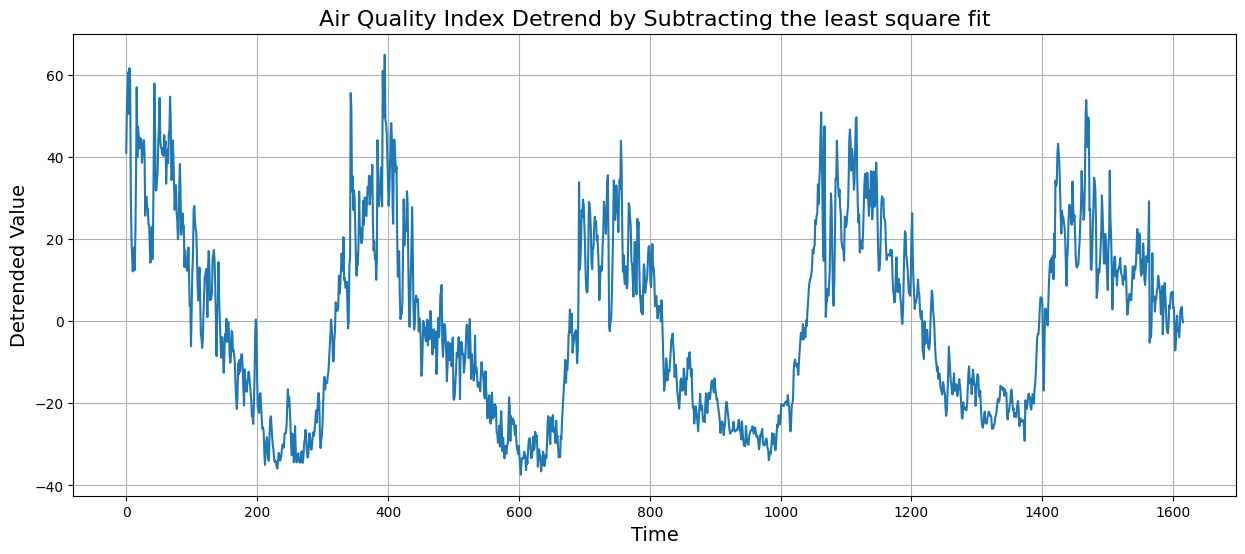

In [6]:
import matplotlib.pyplot as plt
from scipy import signal

# Increase the size of the plot
plt.figure(figsize=(15, 6))

# Detrend the data
detrended = signal.detrend(df.value.values)

# Plot detrended data
plt.plot(detrended)
plt.title('Air Quality Index Detrend by Subtracting the least square fit', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Detrended Value', fontsize=14)
plt.grid(True)
plt.show()

[]

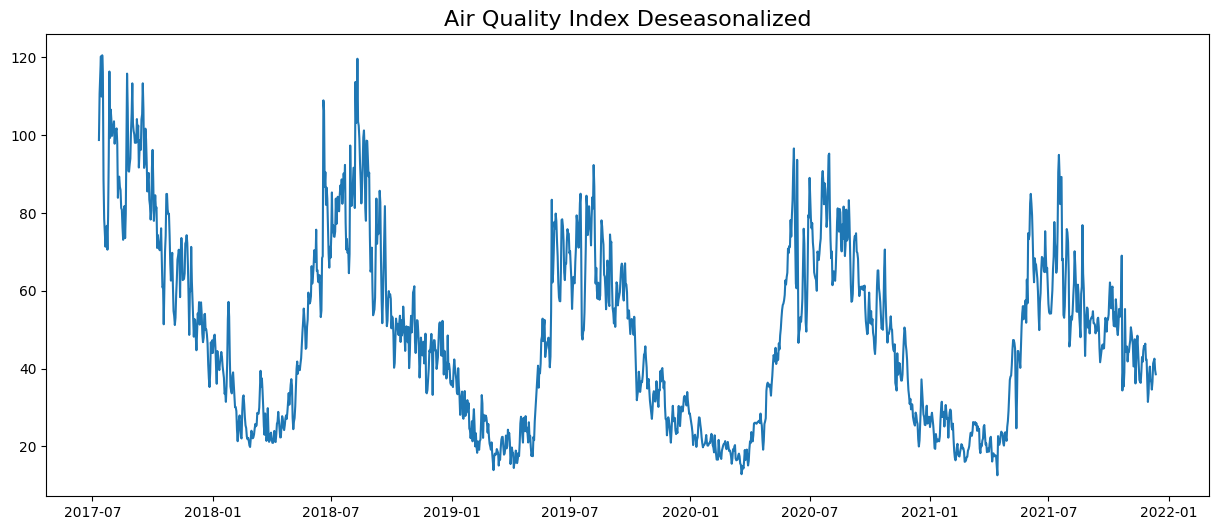

In [7]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set the frequency of the datetime index
df.index = pd.date_range(start='07-11-2017', periods=len(df), freq='D')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.figure(figsize=(15, 6))  # Set the figure size here
plt.plot(deseasonalized)
plt.title('Air Quality Index Deseasonalized', fontsize=16)
plt.plot()


In [8]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [9]:
stepwise_fit = auto_arima(df['value'] , trace = True , suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9862.381, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9957.253, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9955.726, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9954.592, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9955.337, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9863.493, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9860.766, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9904.074, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9930.659, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9862.472, Time=1.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9915.429, Time=0.61 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9863.115, Time=1.93 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=9859.186, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9902.477, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]          

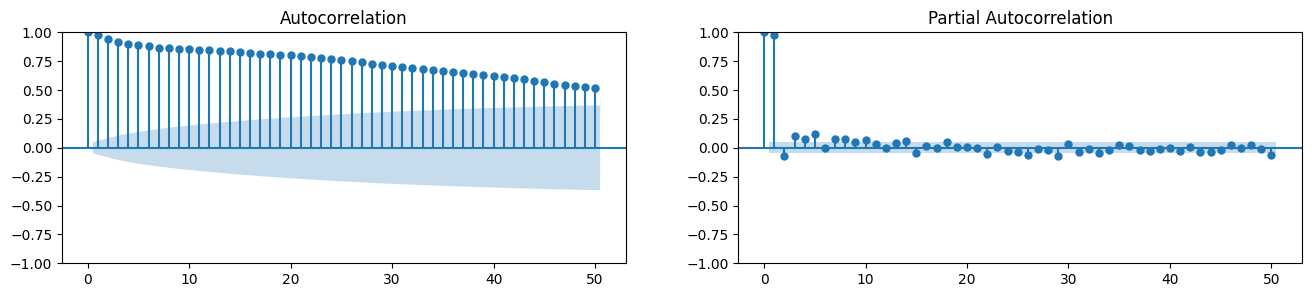

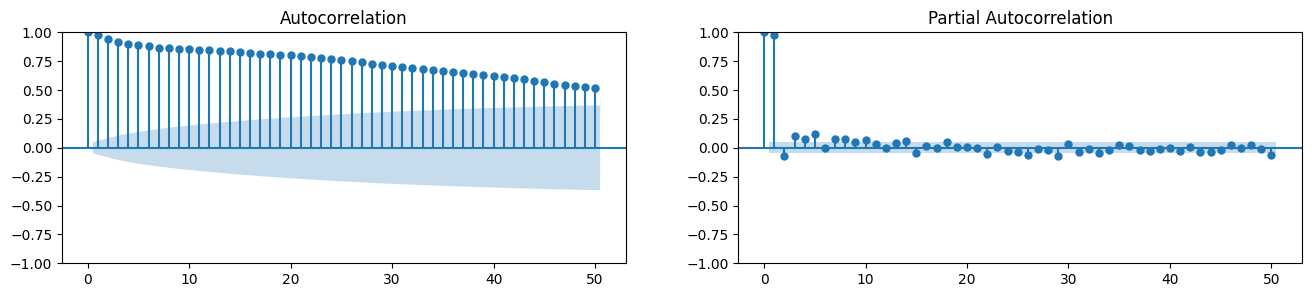

In [10]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

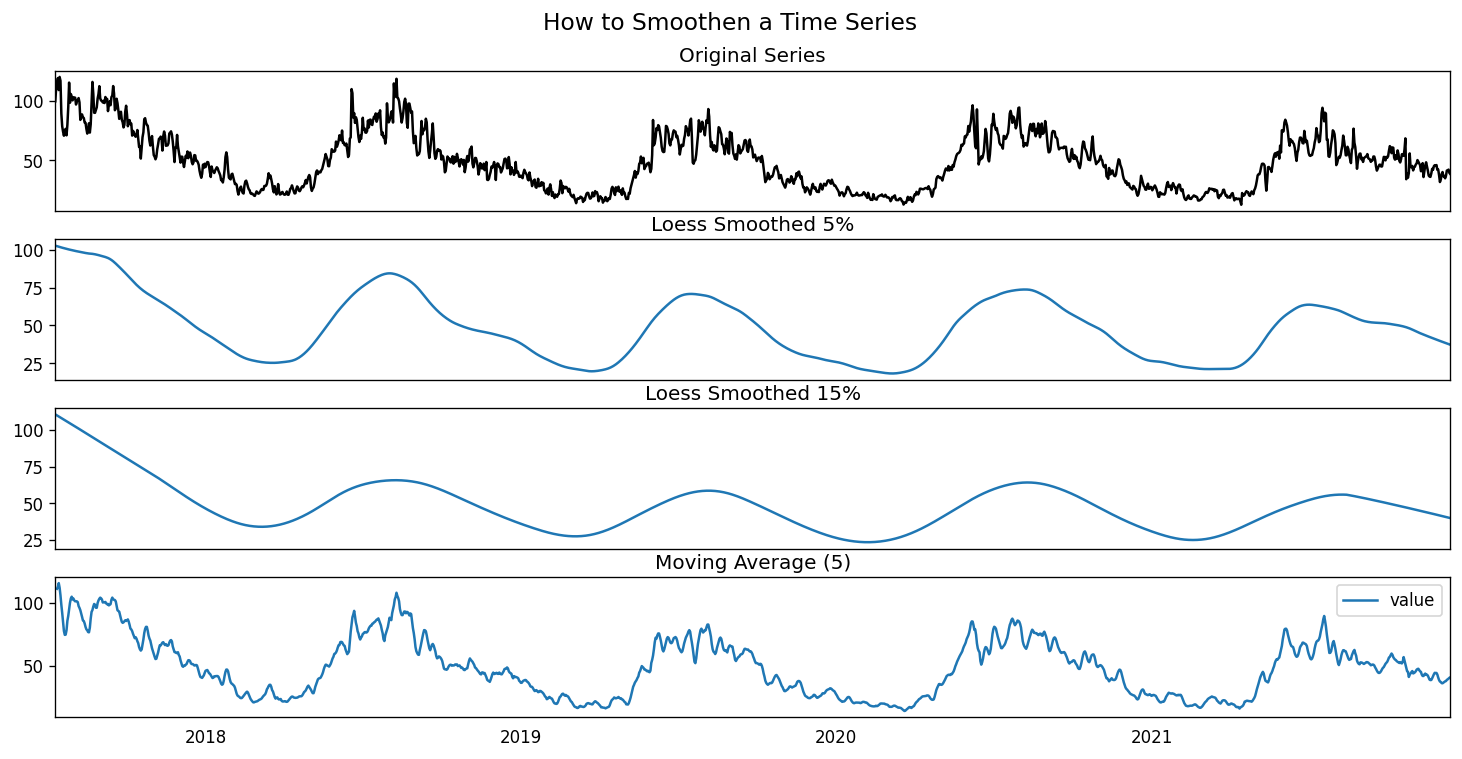

In [11]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})


# 1. Moving Average
import pandas as pd

# Assuming df is your DataFrame with a 'value' column
df_ma = df['value'].rolling(5, center=True, closed='both').mean().to_frame(name='value')

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.05)[:, 1], index=df.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.15)[:, 1], index=df.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(15, 7), sharex=True, dpi=120)
df['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (5)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

In [12]:
df_ma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1616 entries, 2017-07-11 to 2021-12-12
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1613 non-null   float64
dtypes: float64(1)
memory usage: 25.2 KB


In [13]:
df_ma.value[0] = 99.805833
df_ma.value[1] = 110.979565
df_ma.value[-1] = 38.503750

In [14]:
df_ma

,value
2017-07-11,99.805833
2017-07-12,110.979565
2017-07-13,110.874519
2017-07-14,112.454433
2017-07-15,115.344571
...,...
2021-12-08,39.024861
2021-12-09,39.443681
2021-12-10,40.045625
2021-12-11,40.659167


In [15]:
from statsmodels.tsa.arima_model import ARIMA
train = df_ma.iloc[:-30]
test = df_ma.iloc[-30:]
print(train.shape , test.shape)

(1586, 1) (30, 1)


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the ARIMA model
model = SARIMAX(train.value.values, order=(2, 1, 1))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1586
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2502.255
Date:                Wed, 03 Apr 2024   AIC                           5012.510
Time:                        09:51:41   BIC                           5033.984
Sample:                             0   HQIC                          5020.488
                               - 1586                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5928      0.025     63.594      0.000       1.544       1.642
ar.L2         -0.7226      0.017    -42.053      0.000      -0.756      -0.689
ma.L1         -0.7418      0.032    -23.338      0.0

In [17]:
# Get the estimated parameters
params = model_fit.params

# Define the start and end points for prediction
start = len(train)
end = len(train) + len(test) - 1

# Predict using the ARIMA model
pred = model_fit.predict(start=start, end=end, typ='levels', params=params)

pred = pd.Series(pred, index=df.index[start:end+1] , name='predicted')

# Display the predictions
print(pred)


2021-11-13    44.612689
2021-11-14    45.762002
2021-11-15    46.661478
2021-11-16    47.263716
2021-11-17    47.573035
2021-11-18    47.630567
2021-11-19    47.498702
2021-11-20    47.247098
2021-11-21    46.941625
2021-11-22    46.636865
2021-11-23    46.372167
2021-11-24    46.170763
2021-11-25    46.041227
2021-11-26    45.980428
2021-11-27    45.977185
2021-11-28    46.015951
2021-11-29    46.080039
2021-11-30    46.154109
2021-12-01    46.225780
2021-12-02    46.286417
2021-12-03    46.331213
2021-12-04    46.358751
2021-12-05    46.370245
2021-12-06    46.368655
2021-12-07    46.357818
2021-12-08    46.341705
2021-12-09    46.323871
2021-12-10    46.307107
2021-12-11    46.293292
2021-12-12    46.283401
Freq: D, Name: predicted, dtype: float64


In [18]:
import pandas as pd

# Get the predicted dates
predicted_dates = pd.date_range(start=test.index[0], periods=len(test), freq=test.index.freq)

# Create a DataFrame with predicted values and set the index to the predicted dates
pred_df = pd.DataFrame(pred, index=predicted_dates, columns=['Predicted'])



<Axes: >

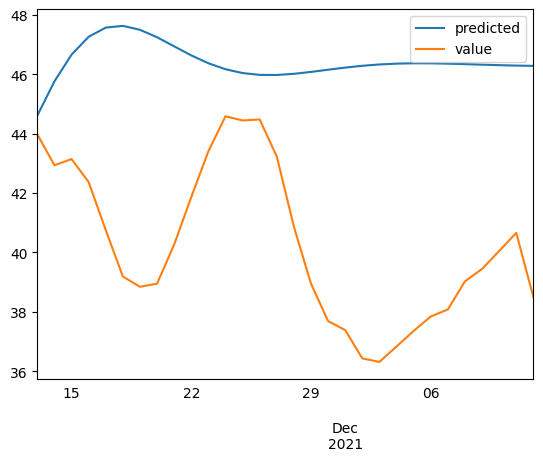

In [19]:
pred.plot(legend=True)
test['value'].plot(legend=True)

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(pred , test['value'])
print("Mean Squared Error(mse)  ")
print( mse)

Mean Squared Error(mse)  
45.590611866833136


In [21]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(test['value'], pred)
print("R-squared Score:", r2)


R-squared Score: -5.919936368054084


In [22]:
index_future_dates = pd.date_range(start = '2021-12-13',end = '2022-01-12')
fu_pred = model_fit.predict(start = len(df) , end = len(df)+30 , typ = 'levels')
fu_pred = pd.Series(fu_pred, index=index_future_dates).rename("Arima predicted")
fu_pred.index = index_future_dates
print(fu_pred)


2021-12-13    46.277627
2021-12-14    46.275579
2021-12-15    46.276488
2021-12-16    46.279415
2021-12-17    46.283422
2021-12-18    46.287688
2021-12-19    46.291588
2021-12-20    46.294718
2021-12-21    46.296885
2021-12-22    46.298075
2021-12-23    46.298404
2021-12-24    46.298070
2021-12-25    46.297298
2021-12-26    46.296312
2021-12-27    46.295297
2021-12-28    46.294395
2021-12-29    46.293690
2021-12-30    46.293219
2021-12-31    46.292979
2022-01-01    46.292937
2022-01-02    46.293043
2022-01-03    46.293242
2022-01-04    46.293483
2022-01-05    46.293723
2022-01-06    46.293931
2022-01-07    46.294088
2022-01-08    46.294190
2022-01-09    46.294237
2022-01-10    46.294238
2022-01-11    46.294208
2022-01-12    46.294157
Freq: D, Name: Arima predicted, dtype: float64
